In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [5]:
IMAGE_SIZE = 256
CHANNELS = 3

In [7]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the correct dataset paths
dataset_path = r"C:\code\potato disease\training\Potato"

train_path = os.path.join(dataset_path, "train")
val_path = os.path.join(dataset_path, "valid")
test_path = os.path.join(dataset_path, "test")

# Define image size
IMAGE_SIZE = 256

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)

# No augmentation for validation and test
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load training images
train_generator = train_datagen.flow_from_directory(
    train_path,  
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse"
)

# Load validation images
val_generator = val_test_datagen.flow_from_directory(
    val_path,  
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse"
)

# Load test images
test_generator = val_test_datagen.flow_from_directory(
    test_path,  
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse",
    shuffle=False  # No shuffling for test data
)


Found 900 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [9]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [11]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [13]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.5315846  0.51589835 0.57080036]
  [0.53064245 0.5149562  0.56985813]
  [0.5297003  0.514014   0.56891596]
  ...
  [0.5793192  0.57147604 0.626378  ]
  [0.62115467 0.6133115  0.6682135 ]
  [0.55910087 0.5512577  0.6061597 ]]

 [[0.5194241  0.5037378  0.5586398 ]
  [0.5203663  0.50468004 0.559582  ]
  [0.52130854 0.50562227 0.5605242 ]
  ...
  [0.58285236 0.5750092  0.6299112 ]
  [0.615737   0.6078939  0.66279584]
  [0.5687584  0.5609153  0.61581725]]

 [[0.52805775 0.5123715  0.56727344]
  [0.52735114 0.51166487 0.5665668 ]
  [0.52664447 0.5109582  0.56586015]
  ...
  [0.58638567 0.57854253 0.6334445 ]
  [0.6103193  0.6024762  0.6573782 ]
  [0.57841593 0.5705728  0.62547475]]

 ...

 [[0.5767591  0.56891596 0.6238179 ]
  [0.5833984  0.57555526 0.6304572 ]
  [0.59331113 0.585468   0.64036995]
  ...
  [0.7907804  0.7829373  0.8339177 ]
  [0.7971403  0.78929716 0.84027755]
  [0.8035001  0.795657   0.84663737]]

 [[0.5777013  0.56985813 0.6247601 ]
  [0.58363396 0.5757908  0.6306928 ]


In [15]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        val_path,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 300 images belonging to 3 classes.


In [17]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 300 images belonging to 3 classes.


In [19]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.60995203 0.5275991  0.54720694]
  [0.60931146 0.5269585  0.54656637]
  [0.60867095 0.526318   0.54592586]
  ...
  [0.6566491  0.58998245 0.62919813]
  [0.6759936  0.6093269  0.64854264]
  [0.6862745  0.61960787 0.65882355]]

 [[0.6138209  0.531468   0.5510758 ]
  [0.6131804  0.53082746 0.5504353 ]
  [0.6125399  0.53018695 0.5497948 ]
  ...
  [0.6598518  0.5931851  0.6324008 ]
  [0.67919624 0.6125296  0.65174526]
  [0.6862745  0.61960787 0.65882355]]

 [[0.61167926 0.52932626 0.5489341 ]
  [0.61296034 0.53060734 0.5502152 ]
  [0.6142414  0.5318884  0.55149627]
  ...
  [0.66305447 0.59638774 0.6356035 ]
  [0.6823989  0.61573225 0.65494794]
  [0.6862745  0.61960787 0.65882355]]

 ...

 [[0.72627646 0.66745293 0.6949039 ]
  [0.67368877 0.6148652  0.64231616]
  [0.6884419  0.62961835 0.6570693 ]
  ...
  [0.65273464 0.5821464  0.63704836]
  [0.65081304 0.5802248  0.63512677]
  [0.6488914  0.57830316 0.6332051 ]]

 [[0.7147467  0.6559232  0.68337417]
  [0.6762509  0.61742735 0.6448783 ]


In [21]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

C:\Users\raman\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=30,
)


C:\Users\raman\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
29/47 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.3372 - loss: 1.0999

C:\Users\raman\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


47/47 ━━━━━━━━━━━━━━━━━━━━ 49s 941ms/step - accuracy: 0.3506 - loss: 1.0984 - val_accuracy: 0.5417 - val_loss: 1.0773
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 43s 895ms/step - accuracy: 0.6517 - loss: 0.8854 - val_accuracy: 0.8177 - val_loss: 0.4793
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 43s 891ms/step - accuracy: 0.7944 - loss: 0.4575 - val_accuracy: 0.8542 - val_loss: 0.3476
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 43s 895ms/step - accuracy: 0.8511 - loss: 0.3589 - val_accuracy: 0.6979 - val_loss: 0.6390
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 43s 890ms/step - accuracy: 0.8375 - loss: 0.4050 - val_accuracy: 0.8958 - val_loss: 0.2546
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 43s 889ms/step - accuracy: 0.8840 - loss: 0.2714 - val_accuracy: 0.8854 - val_loss: 0.2677
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 43s 904ms/step - accuracy: 0.9043 - loss: 0.2284 - val_accuracy: 0.8542 - val_loss: 0.3440
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 43s 893ms/step - accuracy: 0.8996 - loss: 0.2497 - val_accuracy: 0.932

In [29]:
scores = model.evaluate(test_generator)


10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 670ms/step - accuracy: 0.9701 - loss: 0.1063


In [31]:
scores

[0.11809318512678146, 0.9599999785423279]

In [33]:
history

In [35]:
history.params


{'verbose': 1, 'epochs': 30, 'steps': 47}

In [37]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [39]:
type(history.history['loss'])



list

In [41]:
len(history.history['loss'])

30

In [43]:
history.history['loss'][:5] # show loss for first 5 epochs



[1.0959843397140503,
 0.7964545488357544,
 0.4266603887081146,
 0.389350950717926,
 0.3658839166164398]

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


In [47]:
val_acc

[0.5416666865348816,
 0.8177083134651184,
 0.8541666865348816,
 0.6979166865348816,
 0.8958333134651184,
 0.8854166865348816,
 0.8541666865348816,
 0.9322916865348816,
 0.8697916865348816,
 0.9270833134651184,
 0.9375,
 0.9375,
 0.9010416865348816,
 0.9739583134651184,
 0.9479166865348816,
 0.890625,
 0.953125,
 0.8958333134651184,
 0.9010416865348816,
 0.921875,
 0.9375,
 0.9166666865348816,
 0.9479166865348816,
 0.9427083134651184,
 0.9375,
 0.9375,
 0.9635416865348816,
 0.9583333134651184,
 0.953125,
 0.9791666865348816]

In [49]:
acc

[0.3722222149372101,
 0.653333306312561,
 0.8111110925674438,
 0.8377777934074402,
 0.8566666841506958,
 0.8933333158493042,
 0.8999999761581421,
 0.8999999761581421,
 0.9311110973358154,
 0.9177777767181396,
 0.9288889169692993,
 0.9444444179534912,
 0.9411110877990723,
 0.9377777576446533,
 0.945555567741394,
 0.9422222375869751,
 0.948888897895813,
 0.9300000071525574,
 0.8833333253860474,
 0.9355555772781372,
 0.945555567741394,
 0.949999988079071,
 0.9477777481079102,
 0.9722222089767456,
 0.9644444584846497,
 0.9811111092567444,
 0.9711111187934875,
 0.9733333587646484,
 0.9733333587646484,
 0.9744444489479065]

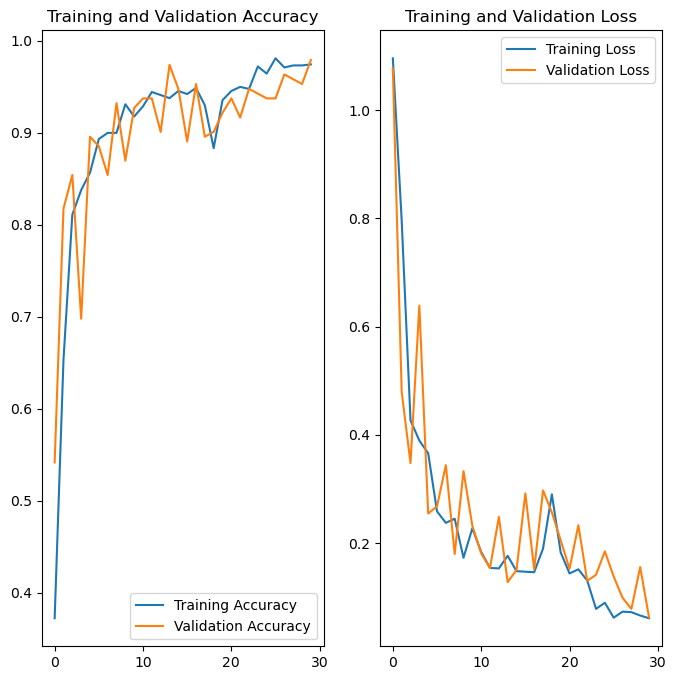

In [53]:
EPOCHS = 30

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict:


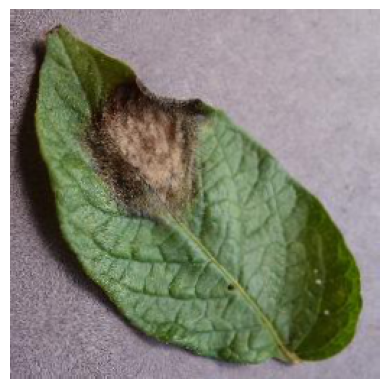

Actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
Predicted label: Potato___Late_blight


In [55]:
import numpy as np
import matplotlib.pyplot as plt

class_names = ["Potato___Early_blight", "Potato___Late_blight", "Potato___healthy"]

for image_batch, label_batch in test_generator:
    first_image = image_batch[0]  # Get the first image in the batch
    first_label = int(label_batch[0])  # Fix: Use 'label_batch' instead of 'labels_batch'
    
    print("First image to predict:")
    plt.imshow(first_image)
    plt.axis("off")  # Hide axis for better visualization
    plt.show()
    
    print("Actual label:", class_names[first_label])  # Print actual class
    
    batch_prediction = model.predict(image_batch)  # Fix: Use 'image_batch' instead of 'images_batch'
    predicted_label = np.argmax(batch_prediction[0])  # Get the predicted class index

    print("Predicted label:", class_names[predicted_label])  # Print predicted class
    
    break  # Stop after the first batch


In [57]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


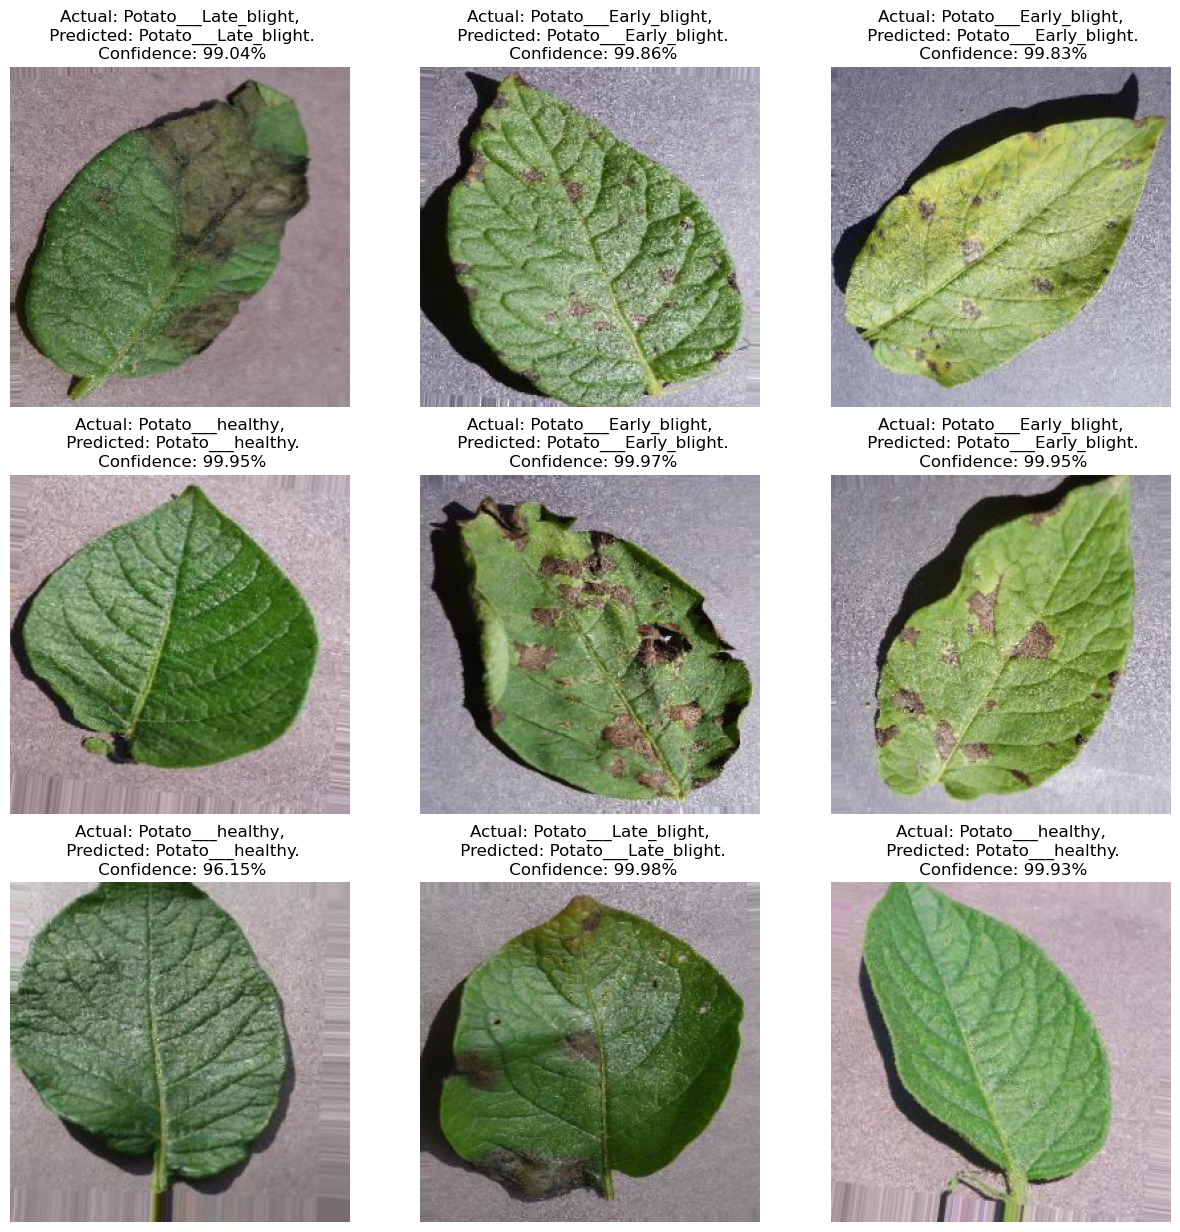

In [59]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [61]:
import tensorflow as tf
import os

# Define the directory to save the model (make sure to use a versioned directory)
saved_model_dir = "C:/code/potato_disease/Models/potato_disease_model/3"  # Versioned directory

# Export the model as a SavedModel for TensorFlow Serving
model.export(saved_model_dir)

print(f"Model exported in TensorFlow SavedModel format at: {saved_model_dir}")


INFO:tensorflow:Assets written to: C:/code/potato_disease/Models/potato_disease_model/3\assets


INFO:tensorflow:Assets written to: C:/code/potato_disease/Models/potato_disease_model/3\assets


Saved artifact at 'C:/code/potato_disease/Models/potato_disease_model/3'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2810397452304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2810397453456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2810397452112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2810397451728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2810397451536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2810397452880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2810397453840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2810397452688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2810397453072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2810397455568: TensorSpec(shape=(), dtype=tf.resource, name=None)
